# Study Task

## Case Study McDonalds Data Set

### Step 1: Deciding (not) to Segment 					
McDonald’s can take the position that it caters to the entire market and that there is no need to understand systematic differences across market segments. Alternatively, McDonald’s can take the position that, despite their market power, there is value in investigating systematic heterogeneity among consumers and harvest these differences using a differentiated marketing strategy. 
				


### Step 2: Specifying the Ideal Target Segment 

McDonald's management must identify key features that make a market segment attractive to them. The target segment needs to be homogeneous, distinct, large enough, matching McDonald's strengths, identifiable, and reachable. They can choose a segment with a positive perception of McDonald's, frequents eating out, and likes fast food. They may also consider segments that are currently not favorable toward McDonald's to understand and modify perceptions. The attractiveness criteria used in this case study are liking McDonald's and frequently eating at McDonald's. These criteria inform target segment selection in Step 8.				
			


### Step 3: Collecting Data 
				
Here a data set collected from 1453 adult Australian consumers regarding their perceptions of McDonald's in relation to various attributes. These attributes were determined through a qualitative study and include items such as YUMMY, CONVENIENT, SPICY, FATTENING, and others. Respondents indicated whether they believe McDonald's possesses each attribute or not, along with providing their age and gender. The data set could have been further enhanced for a market segmentation study by collecting additional information on dining behavior and information channel usage to create more detailed market segments.


### Step 4: Exploring Data

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
mcdonalds= pd.read_csv(r'/Users/akshaya/Downloads/McDonalds Case Study/mcdonalds.csv')

In [4]:
mcdonalds

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,I hate it!-5,47,Once a year,Male
1449,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No,+2,36,Once a week,Female
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No,+3,52,Once a month,Female
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No,+4,41,Every three months,Male


In [5]:
print(mcdonalds.columns)

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')


In [6]:
print(mcdonalds.shape)

(1453, 15)


In [7]:
mcdonalds.head(3)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female


In [8]:
MD_x = mcdonalds.iloc[:, 0:11].values  # as.matrix(mcdonalds[, 1:11])

In [9]:
MD_x = (MD_x == "Yes").astype(int)  # (MD.x == "Yes") + 0

In [10]:
column_means = np.round(np.mean(MD_x, axis=0), 2)  # round(colMeans(MD.x), 2)
print(column_means)

[0.55 0.91 0.09 0.87 0.53 0.9  0.6  0.64 0.36 0.2  0.24]


### PCA

In [11]:
from sklearn.decomposition import PCA

In [12]:
pca = PCA()
MD_pca = pca.fit(MD_x)

# Summary of PCA results
print("Importance of components:")
print(pd.DataFrame({
    "Standard deviation": np.round(np.sqrt(MD_pca.explained_variance_), 4),  # Standard deviation in R
    "Proportion of Variance": np.round(MD_pca.explained_variance_ratio_, 4),  # Proportion of Variance in R
    "Cumulative Proportion": np.round(np.cumsum(MD_pca.explained_variance_ratio_), 4)  # Cumulative Proportion in R
}))

Importance of components:
    Standard deviation  Proportion of Variance  Cumulative Proportion
0               0.7570                  0.2994                 0.2994
1               0.6075                  0.1928                 0.4922
2               0.5046                  0.1330                 0.6253
3               0.3988                  0.0831                 0.7084
4               0.3374                  0.0595                 0.7679
5               0.3103                  0.0503                 0.8182
6               0.2897                  0.0438                 0.8620
7               0.2751                  0.0395                 0.9016
8               0.2653                  0.0368                 0.9383
9               0.2488                  0.0324                 0.9707
10              0.2369                  0.0293                 1.0000


In [13]:
print("Standard deviations (1, .., p=11):")
print(np.round(MD_pca.singular_values_, 1))  # R's print(MD.pca, digits = 1)

Standard deviations (1, .., p=11):
[28.8 23.1 19.2 15.2 12.9 11.8 11.  10.5 10.1  9.5  9. ]


In [14]:
print("Rotation (n x k) = (11 x 11):")
print(pd.DataFrame(np.round(MD_pca.components_.T, 3), index=mcdonalds.columns[:11], columns=[f"PC{i+1}" for i in range(11)]))


Rotation (n x k) = (11 x 11):
              PC1    PC2    PC3    PC4    PC5    PC6    PC7    PC8    PC9  \
yummy      -0.477  0.364 -0.304  0.055 -0.308  0.171 -0.281  0.013  0.572   
convenient -0.155  0.016 -0.063 -0.142  0.278 -0.348 -0.060 -0.113 -0.018   
spicy      -0.006  0.019 -0.037  0.198  0.071 -0.355  0.708  0.376  0.400   
fattening   0.116 -0.034 -0.322 -0.354 -0.073 -0.407 -0.386  0.590 -0.161   
greasy      0.304 -0.064 -0.802  0.254  0.361  0.209  0.036 -0.138 -0.003   
fast       -0.108 -0.087 -0.065 -0.097  0.108 -0.595 -0.087 -0.628  0.166   
cheap      -0.337 -0.611 -0.149  0.119 -0.129 -0.103 -0.040  0.140  0.076   
tasty      -0.472  0.307 -0.287 -0.003 -0.211 -0.077  0.360 -0.073 -0.639   
expensive   0.329  0.601  0.024  0.068 -0.003 -0.261 -0.068  0.030  0.067   
healthy    -0.214  0.077  0.192  0.763  0.288 -0.178 -0.350  0.176 -0.186   
disgusting  0.375 -0.140 -0.089  0.370 -0.729 -0.211 -0.027 -0.167 -0.072   

             PC10   PC11  
yummy      -0.110 

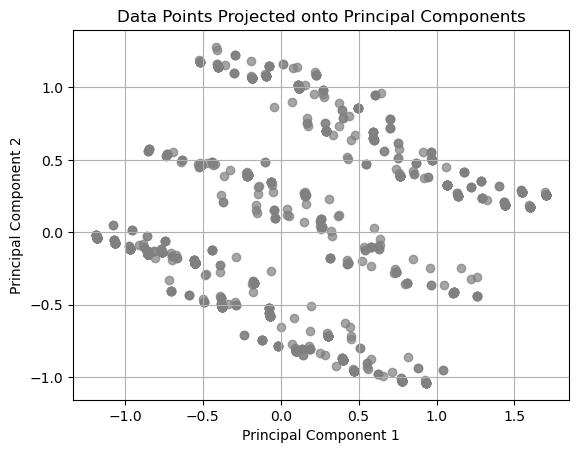

In [15]:
pca = PCA()  # Create a PCA object
MD_pca = pca.fit_transform(MD_x)  # Project data onto principal components

# Plot the projected data points
plt.scatter(MD_pca[:, 0], MD_pca[:, 1], c='gray', alpha=0.7)  # Plot first two components
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Data Points Projected onto Principal Components')
plt.grid(True)
plt.show()

eigenvectors = pca.components_  

### Step 5: Extracting Segments

### 5.1 Using KMeans

In [16]:
from sklearn.cluster import KMeans

# Setting seed
np.random.seed(1234)

# Assuming MD.x is your data, replace it with your actual data
# MD.x = Your data matrix

# Generating clusters using KMeans
results = {}
for n_clusters in range(2, 9):
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=1234)
    kmeans.fit(MD_x)
    results[n_clusters] = kmeans.labels_
    
print(results)

{2: array([0, 1, 1, ..., 1, 1, 0], dtype=int32), 3: array([2, 1, 1, ..., 1, 0, 2], dtype=int32), 4: array([0, 3, 3, ..., 3, 2, 1], dtype=int32), 5: array([1, 4, 0, ..., 0, 2, 3], dtype=int32), 6: array([5, 2, 0, ..., 0, 1, 3], dtype=int32), 7: array([4, 5, 2, ..., 2, 1, 3], dtype=int32), 8: array([7, 0, 1, ..., 1, 6, 2], dtype=int32)}


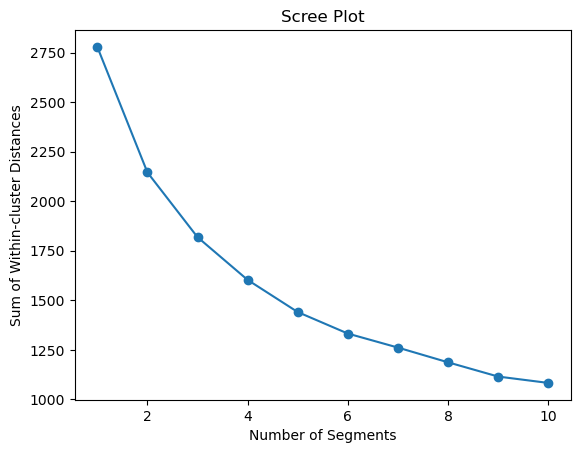

In [17]:
sum_of_squared_distances = []
for n_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=1234)
    kmeans.fit(MD_x)
    sum_of_squared_distances.append(kmeans.inertia_)

# Plotting the scree plot
plt.plot(range(1, 11), sum_of_squared_distances, marker='o')
plt.xlabel('Number of Segments')
plt.ylabel('Sum of Within-cluster Distances')
plt.title('Scree Plot')
plt.show()

In [18]:
print(MD_x)

[[0 1 0 ... 1 0 0]
 [1 1 0 ... 1 0 0]
 [0 1 1 ... 1 1 0]
 ...
 [1 1 0 ... 1 0 0]
 [1 1 0 ... 0 1 0]
 [0 1 0 ... 1 0 1]]


### Global Stability Analysis:

In [19]:
import seaborn as sns
#import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

# Setting seed
np.random.seed(1234)

# Assuming MD_x is your data, replace it with your actual data
# MD_x = Your data matrix

# Parameters
n_clusters_range = range(2, 9)
nrep = 10
nboot = 100

# Perform bootstrapped clustering
boot_results = {}
for i in range(nboot):
    bootstrap_indices = np.random.choice(len(MD_x), len(MD_x), replace=True)
    bootstrap_data = MD_x[bootstrap_indices]
    cluster_labels = {}
    for n_clusters in n_clusters_range:
        kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=1234)
        kmeans.fit(bootstrap_data)
        cluster_labels[n_clusters] = kmeans.labels_
    boot_results[i] = cluster_labels
    
    
adjusted_rand_index = {}
for n_clusters in n_clusters_range:
    adjusted_rand_index[n_clusters] = []
    for i in range(nboot):
        for j in range(i + 1, nboot):
            ari = adjusted_rand_score(boot_results[i][n_clusters], boot_results[j][n_clusters])
            adjusted_rand_index[n_clusters].append(ari)


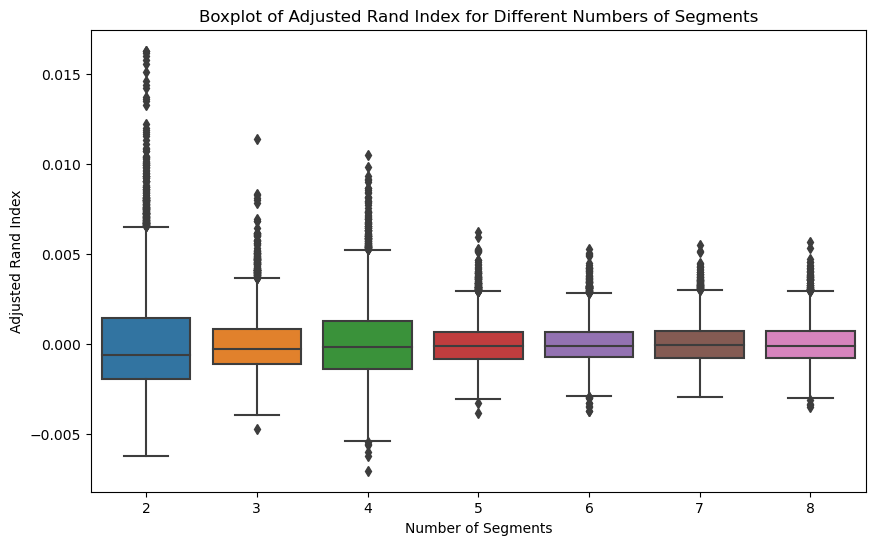

In [20]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=list(adjusted_rand_index.values()))
plt.xticks(np.arange(len(n_clusters_range)), n_clusters_range)
plt.xlabel('Number of Segments')
plt.ylabel('Adjusted Rand Index')
plt.title('Boxplot of Adjusted Rand Index for Different Numbers of Segments')
plt.show()

Global stability of k-meanssegmentation solutions for the fast food dataset

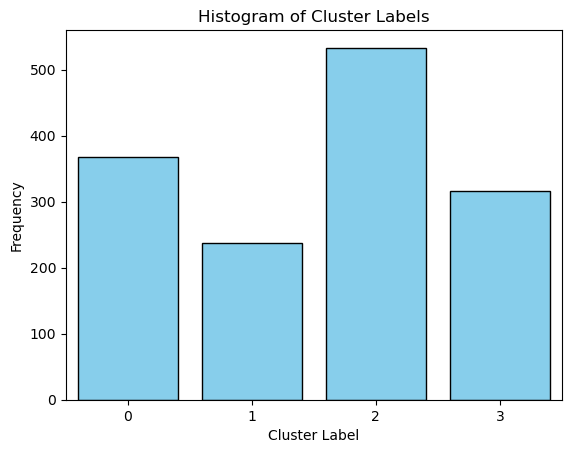

In [21]:
import matplotlib.pyplot as plt

# Assuming MD_x is your data and MD_km28 is your cluster labels for 4 clusters
# Replace MD_x and MD_km28 with your actual data and cluster labels

# MD_km28[4] represents the cluster labels for 4 clusters
cluster_labels_4 = results[4]  # Assuming results is the dictionary containing cluster labels

# Plotting histogram
plt.hist(cluster_labels_4, bins=range(5), align='left', rwidth=0.8, color='skyblue', edgecolor='black')
plt.xticks(range(4))  # Assuming the clusters are labeled from 0 to 3
plt.xlabel('Cluster Label')
plt.ylabel('Frequency')
plt.title('Histogram of Cluster Labels')
plt.xlim(-0.5, 3.5)  # Setting x-axis limit to align bins properly
plt.show()

In [22]:
MD_k4 = results[4]

In [23]:
from sklearn.metrics import silhouette_samples
import numpy as np

def silhouette_width(X, labels):
    silhouette_vals = silhouette_samples(X, labels)
    return np.mean(silhouette_vals)

# Assuming MD_x is your data matrix and MD_k4 is the cluster labels for 4 clusters
silhouette_score = silhouette_width(MD_x, MD_k4)
print("Silhouette Width for 4 clusters:", silhouette_score)

Silhouette Width for 4 clusters: 0.2571323686757166


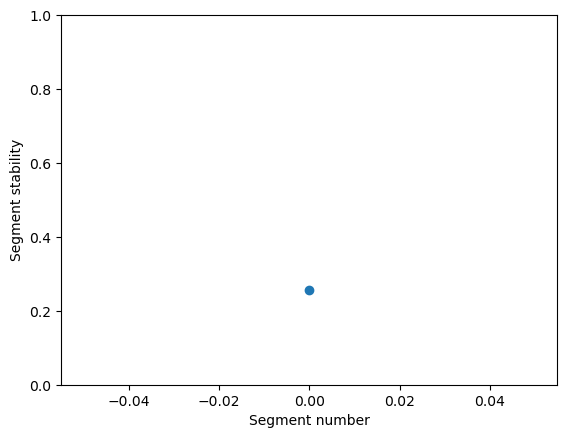

In [24]:
import matplotlib.pyplot as plt

# Assuming MD_r4 contains the result from slswFlexclust (if available in Python)
# If not, you may need to compute the "segment stability" using another method
# and plot it accordingly.

# Example plot if MD_r4 is available
plt.plot(silhouette_score, marker='o')  # Assuming MD_r4 is a list or array
plt.xlabel('Segment number')
plt.ylabel('Segment stability')
plt.ylim(0, 1)  # Setting y-axis limits to 0 and 1
plt.show()

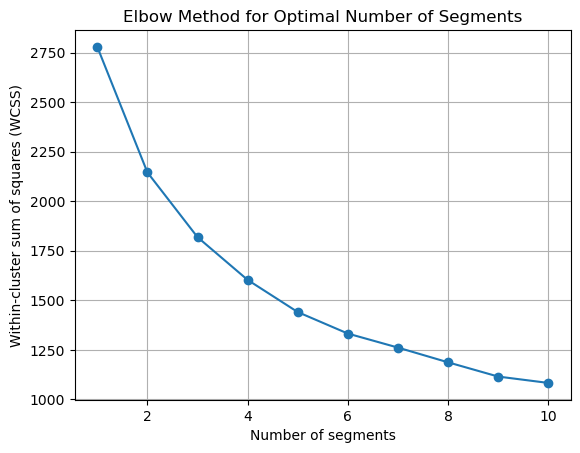

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Assuming MD_x is your data matrix

# Define a function to compute the within-cluster sum of squares (WCSS)
def compute_wcss(data, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=1234)
    kmeans.fit(data)
    return kmeans.inertia_

# Compute WCSS for different numbers of segments
segment_numbers = range(1, 11)  # Adjust range as needed
wcss_values = [compute_wcss(MD_x, n) for n in segment_numbers]

# Plotting WCSS
plt.plot(segment_numbers, wcss_values, marker='o')
plt.xlabel('Number of segments')
plt.ylabel('Within-cluster sum of squares (WCSS)')
plt.title('Elbow Method for Optimal Number of Segments')
plt.grid(True)
plt.show()

### Using Mixtures of Regression Models

In [26]:
like_counts = mcdonalds['Like'].value_counts().sort_index(ascending=False)

print(like_counts)

Like
I love it!+5    143
I hate it!-5    152
0               169
-4               71
-3               73
-2               59
-1               58
+4              160
+3              229
+2              187
+1              152
Name: count, dtype: int64


In [27]:
# import pandas as pd
import re

# # # Sample data
# # data = {
# #     'Like': [
# #         'I love it!+5', 'I hate it!-5', '0', '-4', '-3', '-2', '-1', '+4', '+3', '+2', '+1'
# #     ]
# # }

# # # Assuming mcdonalds is a pandas DataFrame containing the data
# # mcdonalds = pd.DataFrame()

# Extract numeric values from the 'Like' column using regular expressions
mcdonalds['Like_numeric'] = mcdonalds['Like'].apply(lambda x: int(re.search(r'[-+]?\d+', x).group()))

# Print the updated DataFrame
print(mcdonalds[['Like', 'Like_numeric']])

              Like  Like_numeric
0               -3            -3
1               +2             2
2               +1             1
3               +4             4
4               +2             2
...            ...           ...
1448  I hate it!-5            -5
1449            +2             2
1450            +3             3
1451            +4             4
1452            -3            -3

[1453 rows x 2 columns]


In [28]:
like_n_counts = mcdonalds['Like_numeric'].value_counts().sort_index(ascending=False)
print(like_n_counts)

Like_numeric
 5    143
 4    160
 3    229
 2    187
 1    152
 0    169
-1     58
-2     59
-3     73
-4     71
-5    152
Name: count, dtype: int64


In [29]:
import pandas as pd
import statsmodels.formula.api as smf

# Assuming `mcdonalds` is a pandas DataFrame containing the data
column_names = "+".join(mcdonalds.columns[:11])  # Concatenate the names of the first 11 columns with "+"
formula_str = f"Like_numeric ~ {column_names}"  # Append "Like.n ~" to the beginning of the string
formula = smf.ols(formula_str, data=mcdonalds)  # Create a formula object

print(formula)  # Print the resulting formula object

In [30]:
from sklearn.mixture import GaussianMixture

# Assuming 'f' is your formula defined earlier for regression analysis
# Assuming mcdonalds is a pandas DataFrame containing the data

# Set the seed for reproducibility
np.random.seed(1234)

# Assuming 'data' is the subset of your DataFrame containing numerical features for clustering
# You may need to preprocess your data (scaling, handling missing values, etc.) before clustering
data = mcdonalds.select_dtypes(include=[np.number]).dropna()
print(data)

      Age  Like_numeric
0      61            -3
1      51             2
2      62             1
3      69             4
4      49             2
...   ...           ...
1448   47            -5
1449   36             2
1450   52             3
1451   41             4
1452   30            -3

[1453 rows x 2 columns]


In [31]:
# Define the number of components (clusters)
k = 2

# Fit Gaussian Mixture Model
gmm = GaussianMixture(n_components=k, random_state=1234)
gmm.fit(data)

# Assign cluster labels to each data point
cluster_labels = gmm.predict(data)

# Add cluster labels to the DataFrame
mcdonalds['Cluster_Labels'] = cluster_labels

# Print the DataFrame with cluster labels
print(mcdonalds)


     yummy convenient spicy fattening greasy fast cheap tasty expensive  \
0       No        Yes    No       Yes     No  Yes   Yes    No       Yes   
1      Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes   
2       No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes   
3      Yes        Yes    No       Yes    Yes  Yes   Yes   Yes        No   
4       No        Yes    No       Yes    Yes  Yes   Yes    No        No   
...    ...        ...   ...       ...    ...  ...   ...   ...       ...   
1448    No        Yes    No       Yes    Yes   No    No    No       Yes   
1449   Yes        Yes    No       Yes     No   No   Yes   Yes        No   
1450   Yes        Yes    No       Yes     No  Yes    No   Yes       Yes   
1451   Yes        Yes    No        No     No  Yes   Yes   Yes        No   
1452    No        Yes    No       Yes    Yes   No    No    No       Yes   

     healthy disgusting          Like  Age      VisitFrequency  Gender  \
0         No         No  

In [32]:
 #Count occurrences of each cluster label
cluster_sizes = np.bincount(cluster_labels)

# Print cluster sizes
for cluster, size in enumerate(cluster_sizes):
    print(f"Cluster {cluster + 1}: {size}")

Cluster 1: 688
Cluster 2: 765


In [33]:
gmm_refit = GaussianMixture(n_components=len(np.unique(cluster_labels)), random_state=1234)
gmm_refit.fit(data)

# Summarize the results
print(gmm_refit.means_)
print(gmm_refit.covariances_)
print(gmm_refit.weights_)

[[31.97825908  1.57411647]
 [55.93650926  0.06166996]]
[[[60.96552496 -3.50035269]
  [-3.50035269  8.22423887]]

 [[57.27901353 -0.85711043]
  [-0.85711043  9.95768974]]]
[0.47297085 0.52702915]


In [34]:
import statsmodels.api as sm

# Assuming 'cluster_labels' is the array containing the cluster labels
# Assuming 'mcdonalds' is your DataFrame

# Separate the data into clusters based on the cluster labels
cluster_1_data = mcdonalds[cluster_labels == 0]
cluster_2_data = mcdonalds[cluster_labels == 1]

# Fit regression models for each cluster
model_cluster_1 = sm.OLS.from_formula("Like_numeric ~ yummy + convenient + spicy + fattening + greasy + fast + cheap + tasty + expensive + healthy + disgusting", data=cluster_1_data)
model_cluster_2 = sm.OLS.from_formula("Like_numeric ~ yummy + convenient + spicy + fattening + greasy + fast + cheap + tasty + expensive + healthy + disgusting", data=cluster_2_data)

# Refit the models
result_cluster_1 = model_cluster_1.fit()
result_cluster_2 = model_cluster_2.fit()

# Summarize the results
print(result_cluster_1.summary())
print(result_cluster_2.summary())

                            OLS Regression Results                            
Dep. Variable:           Like_numeric   R-squared:                       0.562
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     78.82
Date:                Wed, 05 Jun 2024   Prob (F-statistic):          2.53e-113
Time:                        17:04:47   Log-Likelihood:                -1408.7
No. Observations:                 688   AIC:                             2841.
Df Residuals:                     676   BIC:                             2896.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -1.9686      0.44

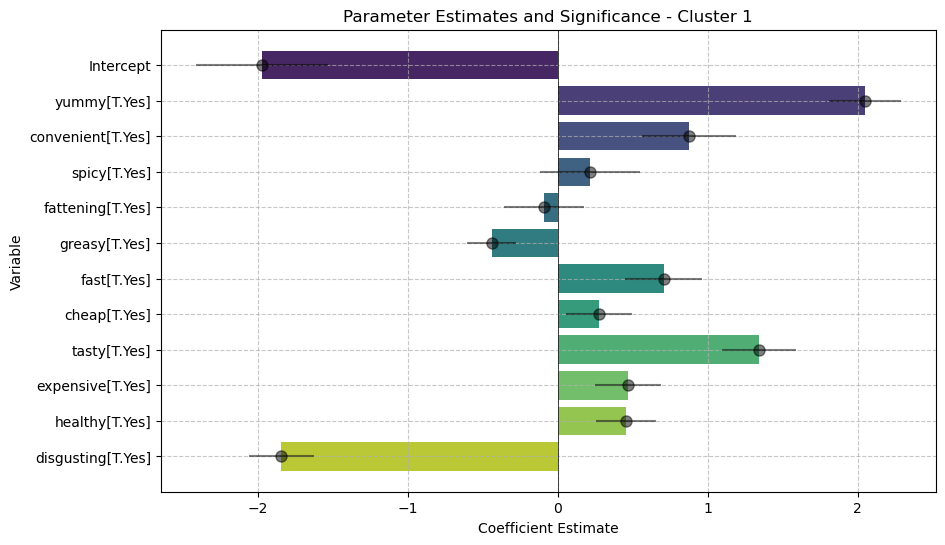

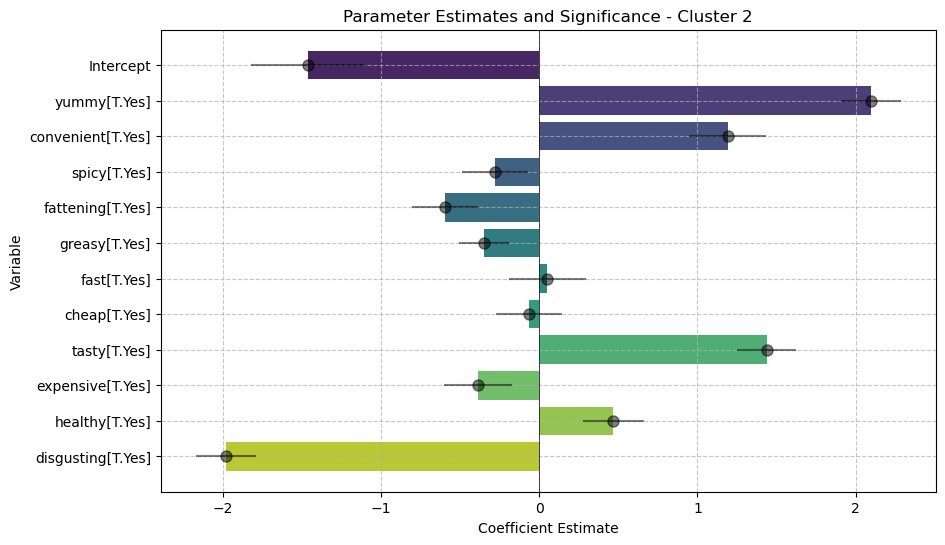

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'result_cluster_1' and 'result_cluster_2' are the fitted regression models
# You can access the coefficients and their significance using 'result_cluster_1.params' and 'result_cluster_1.pvalues'

# Plotting parameters for Cluster 1
plt.figure(figsize=(10, 6))
sns.barplot(x=result_cluster_1.params, y=result_cluster_1.params.index, palette="viridis")
plt.errorbar(x=result_cluster_1.params, y=result_cluster_1.params.index, xerr=result_cluster_1.bse, fmt='o', markersize=8, color='black', alpha=0.5)
plt.axvline(x=0, color='black', linewidth=0.5)
plt.title('Parameter Estimates and Significance - Cluster 1')
plt.xlabel('Coefficient Estimate')
plt.ylabel('Variable')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Plotting parameters for Cluster 2
plt.figure(figsize=(10, 6))
sns.barplot(x=result_cluster_2.params, y=result_cluster_2.params.index, palette="viridis")
plt.errorbar(x=result_cluster_2.params, y=result_cluster_2.params.index, xerr=result_cluster_2.bse, fmt='o', markersize=8, color='black', alpha=0.5)
plt.axvline(x=0, color='black', linewidth=0.5)
plt.title('Parameter Estimates and Significance - Cluster 2')
plt.xlabel('Coefficient Estimate')
plt.ylabel('Variable')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


### Step 6: Profiling Segments

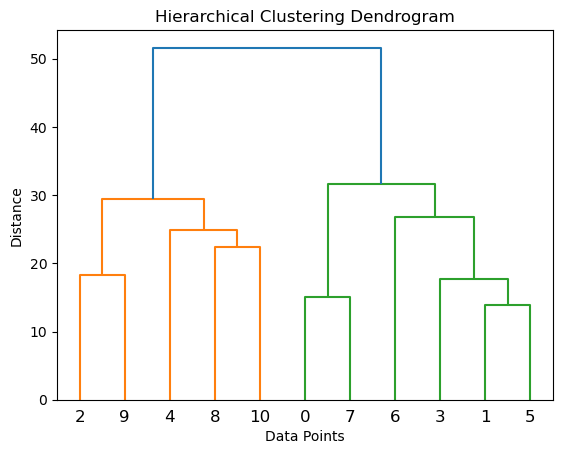

In [37]:
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram
import numpy as np

# Assuming 'MD_x' is your data matrix
# Calculate pairwise distances between columns (attributes)
distances = pdist(np.transpose(MD_x))

# Perform hierarchical clustering
clusters = linkage(distances, method='ward')  # You can specify other linkage methods as well

# Plot the dendrogram
dendrogram(clusters)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

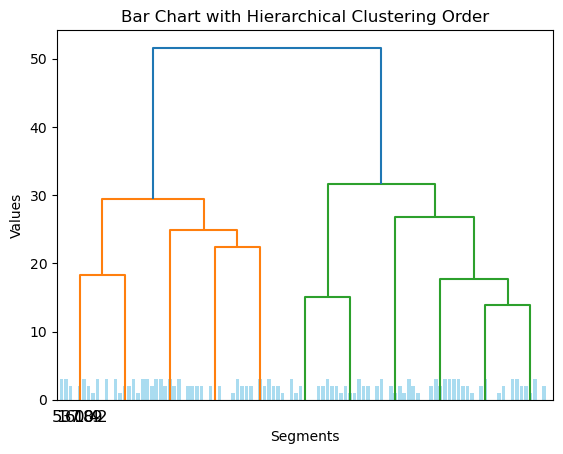

In [38]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram

# Assuming 'MD_k4' is the result of your k-means clustering
# Assuming 'clusters' is the result of your hierarchical clustering

# Define the order based on the hierarchical clustering
order = dendrogram(clusters)['leaves'][::-1]  # Reverse the order

# Plot the bar chart
plt.bar(range(len(MD_k4)), MD_k4, color='skyblue', alpha=0.7)
plt.xticks(range(len(order)), order)  # Use the order from hierarchical clustering
plt.xlabel('Segments')
plt.ylabel('Values')
plt.title('Bar Chart with Hierarchical Clustering Order')
plt.show()


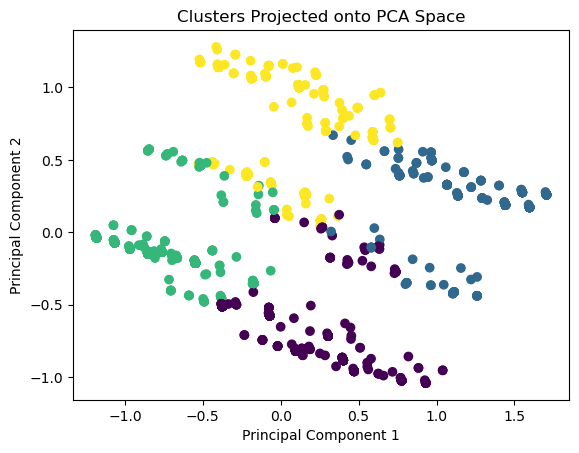

In [39]:
from sklearn.decomposition import PCA

# Assuming 'MD_k4' is the result of your k-means clustering
# Assuming 'MD_pca' is the result of your PCA analysis
# Assuming 'MD_x' is your data

# Plot the clusters projected onto the PCA space
plt.scatter(MD_pca[:, 0], MD_pca[:, 1], c=MD_k4, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clusters Projected onto PCA Space')

# Plot the projection axes
# You may need to specify the directions of the axes based on your PCA results
#plt.quiver(0, 0, MD_x['PC1_loadings'], MD_x['PC2_loadings'], color='red', scale=5)

plt.show()

### Step 7: Describing Segments

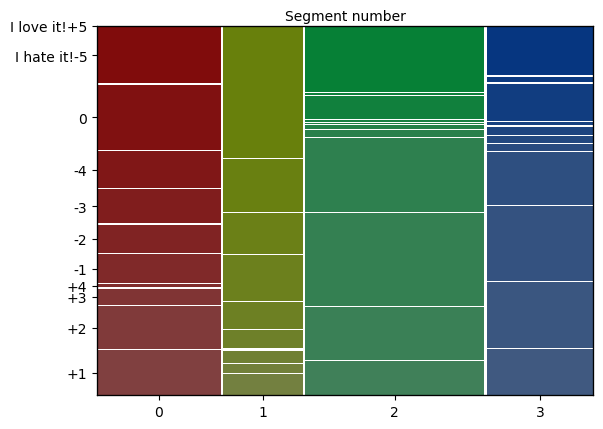

In [40]:
from statsmodels.graphics.mosaicplot import mosaic

# Assuming 'k4' contains the segment membership
# Assuming 'mcdonalds' is the DataFrame containing the 'Like' variable

# Convert 'k4' and 'mcdonalds['Like']' to pandas Series if they are not already
k4_series = pd.Series(MD_k4)
like_series = mcdonalds['Like']

# Create a cross-tabulation table
cross_tab = pd.crosstab(k4_series, like_series)

# Plot the mosaic plot
mosaic(cross_tab.stack(), title='', labelizer=lambda k: '')

# Label the x-axis
plt.xlabel('Segment number')

# Show the plot
plt.show()

### Step 8: Selecting (the) Target Segment(s)

				
This step explains the use of market segmentation criteria to develop a segment evaluation plot for McDonald's managers. The plot represents the frequency of visiting McDonald's on the x-axis and the level of liking or disliking McDonald's on the y-axis, with bubble size indicating the percentage of female consumers. Market segments 3 and 4 are deemed attractive as they like and visit McDonald's frequently, while segment 2 is least attractive due to a dislike for McDonald's. Segment 1 presents a potential target with negative perceptions that can be addressed through marketing actions. The segment evaluation pl


In [41]:
# Assuming 'k4' is a pandas DataFrame column
group_length = len(MD_k4)
print("Length of grouping variable:", group_length)


Length of grouping variable: 1453


In [42]:
# View the dimensions of the data
print(mcdonalds.shape)

(1453, 17)


In [44]:
import pandas as pd

# Assuming 'mcdonalds' is your DataFrame and 'k4' is your segmentation variable
# Convert 'VisitFrequency' column to numeric
mcdonalds['VisitFrequency'] = pd.to_numeric(mcdonalds['VisitFrequency'], errors='coerce')

# Calculate the mean visit frequency for each segment
visit = mcdonalds.groupby(MD_k4)['VisitFrequency'].mean()

print(visit)

0   NaN
1   NaN
2   NaN
3   NaN
Name: VisitFrequency, dtype: float64


In [45]:
import pandas as pd

# Assuming 'mcdonalds' is your DataFrame and 'k4' is the grouping variable
like = mcdonalds.groupby(MD_k4)['Like_numeric'].mean()

print(like)

0   -1.193460
1   -2.662447
2    2.834897
3    2.174051
Name: Like_numeric, dtype: float64


In [46]:
female = mcdonalds['Gender'].eq('Female').astype(int).groupby(MD_k4).mean()
print(female)

0    0.580381
1    0.426160
2    0.607880
3    0.474684
Name: Gender, dtype: float64


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


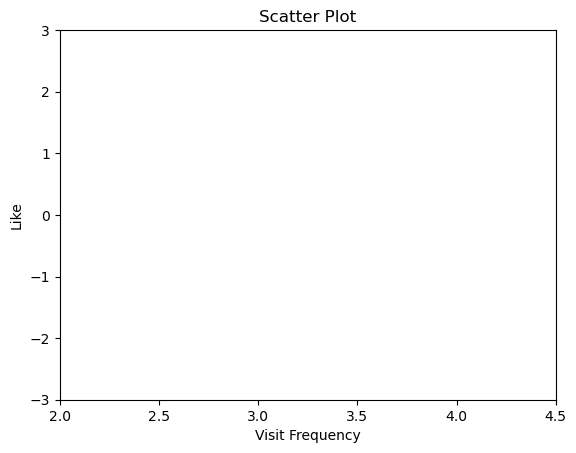

In [47]:
import matplotlib.pyplot as plt

# Assuming 'visit', 'like', and 'female' are the Series containing the corresponding values
# 'k4' is the grouping variable

# Plot the points
plt.scatter(visit, like, s=10 * female, alpha=0.5)

# Add text labels
for i, txt in enumerate(range(1, 5)):
    plt.text(visit[i], like[i], txt)

# Set limits for the axes
plt.xlim(2, 4.5)
plt.ylim(-3, 3)

# Add labels and title
plt.xlabel('Visit Frequency')
plt.ylabel('Like')
plt.title('Scatter Plot')

# Show the plot
plt.show()

### Step 9: Customising the Marketing Mix
In Step 9 of marketing strategy development, McDonald’s can target segment 3 by offering a budget-friendly MCSUPERBUDGET line tailored to their price expectations, aiming to build customer loyalty. This specialized product line should have unique features to differentiate it from the main range. Effective communication channels for this segment must be identified for promotion, while distribution channels can remain the same in McDonald’s outlets. Consideration could be given to having a separate lane for the MCSUPERBUDGET line to prevent cannibalization of the main products.
